In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from datetime import date
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from process import process

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv("../data/train.csv")

In [5]:
# final = process(raw_data)
# final

In [114]:
data = raw_data.copy().dropna()

(150, 2)


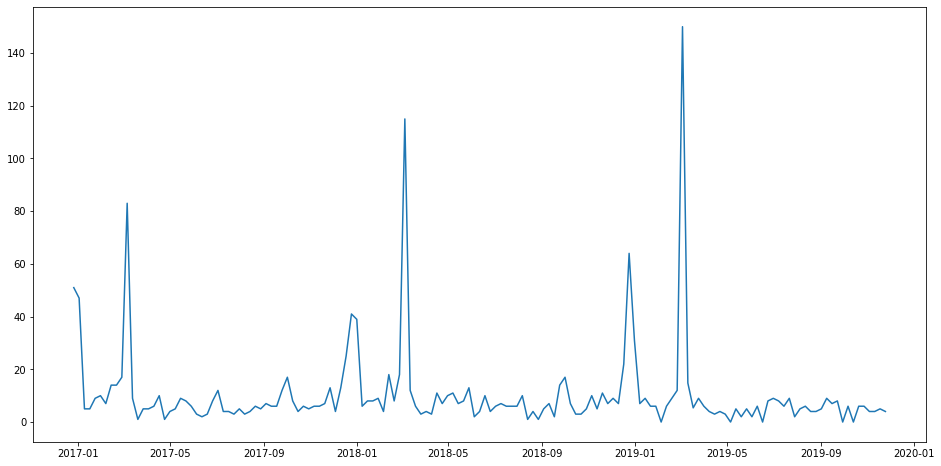

In [115]:
unique_items_grouped = data.groupby(["product_rk","store_location_rk"],as_index=False)
unique_items_sizes = unique_items_grouped.count()[["product_rk","store_location_rk","period_start_dt"]]
unique_items_sizes = pd.DataFrame(unique_items_sizes).rename(columns={"period_start_dt":"days in table"})

full_data_pairs = unique_items_sizes[unique_items_sizes["days in table"]==unique_items_sizes["days in table"].max()]
full_data_pairs = full_data_pairs.reset_index()[["product_rk","store_location_rk"]]
print(full_data_pairs.shape)

def get_local_data(number):
    if number<0 or number>=full_data_pairs.shape[0]:
        raise Exception("numer out of array")
    product_rk,store_location_rk = full_data_pairs.loc[number]
    return data[(data["product_rk"] == product_rk)&(data["store_location_rk"]==store_location_rk)]

local_data = get_local_data(62)
plt.figure(figsize=(16,8))
plt.plot(local_data["period_start_dt"],local_data["demand"])
plt.show()

In [117]:
df = pd.Series(local_data["demand"].tolist(), local_data["period_start_dt"].tolist())

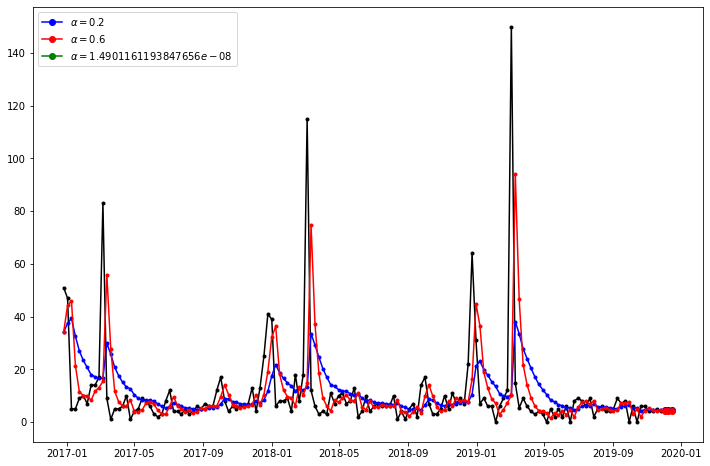

In [133]:
fit1 = SimpleExpSmoothing(df, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
# fit3 = SimpleExpSmoothing(df, initialization_method="estimated").fit()
# fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(df, marker='o', color='black', markersize=3)
plt.plot(fit1.fittedvalues, marker='o', color='blue', markersize=3)
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red', markersize=3)
line2, = plt.plot(fcast2, marker='o', color='red')
# plt.plot(fit3.fittedvalues, marker='o', color='green', markersize=3)
# line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [130]:
# fit = ExponentialSmoothing(df[:80], seasonal="add").fit()

# fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(df)
# fit.fittedvalues.plot(ax=ax, style='--', color='green')

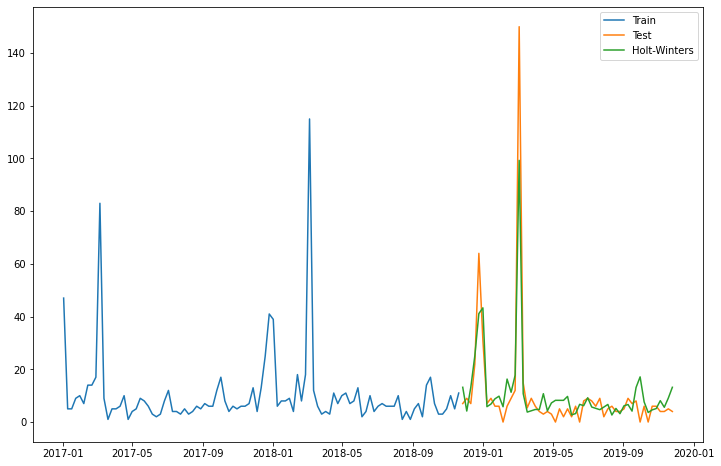

In [132]:
myTimeSeries = df
plt.figure(figsize=(12, 8))
train_size = int(len(myTimeSeries) * 0.66)
train, test = myTimeSeries[1:train_size], myTimeSeries[train_size:]

model = ExponentialSmoothing(train, seasonal="add")
model_fit = model.fit()
d=model.params
params=np.array(list(d.items()))
dates=test.index.astype(str)
pred = model_fit.forecast(len(test))

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Holt-Winters')

plt.legend(loc='best')